# Проект: Анализ рынка компьютерных игр для оптимизации продаж в интернет-магазине "Стримчик" 

## Описание проекта

Проект по анализу рынка компьютерных игр для интернет-магазина "Стримчик". Необходимо выявить ключевые факторы, влияющие на успешность компьютерных игр. Проект предполагает анализ открытых данных о продажах, оценках пользователей и экспертов, жанрах и платформах игр. Результаты исследования помогут прогнозировать популярность игр, оптимизировать закупки и таргетировать рекламу на целевую аудиторию.

**Цели исследования:**

* Изучить открытые данные о продажах компьютерных игр, чтобы выявить закономерности и тенденции, влияющие на успешность игр на рынке.
  
* Анализировать оценки пользователей и экспертов, чтобы понять, как они коррелируют с реализацией игр.

* Исследовать предпочтения игроков по жанрам и платформам, чтобы определить наиболее популярные категории игр.

* Выявить региональные особенности продаж игр, чтобы адаптировать маркетинговые стратегии под различные рынки.

* Оценить влияние рейтингов ESRB на продажи игр, чтобы понять важность возрастных ограничений для успеха продукта.

  

### Загрузка библиотек

In [1]:
#загрузим библиотеки
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#зададим параметры для display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Загрузка данных

In [31]:
#загрузим таблицы
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Обзор данных

Ознакомимся с загруженным набором данных, чтобы получить представление о его структуре, особенностях и потенциале для дальнейшего исследования.

Таблица data (`games.csv`) содержит следующую информацию:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB.
  
      ESRB (англ. Entertainment Software Rating Board) эта ассоциация
  определяет рейтинг компьютерных игр и присваивает им подходящую возрастную
  категорию.

In [32]:
#выведем таблицу
display (data.head(40))
#выведем информацию о таблице
display(data.describe())
display (data.info())
print (f'Таблица содержит {len(data)} строк.')


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Таблица содержит 16715 строк.


### Вывод

В рамках этого исследования мы загрузили необходимые библиотеки и таблицы с данными. Таблица содержит 16175 строк, эта таблица станет основой для анализа и проверки наших исследовательских гипотез. 

## Предобработка данных

Проведем предобработку данных в таблице, чтобы подготовить их для дальнейшего использования в анализе. 

### Переименование столбцов

In [33]:
print (f'Имена столбцов до обработки: {data.keys()}')
#приведем назвния столбцов к одному регистру
data.columns = data.columns.str.lower()

print (f'Имена столбцов после обработки: {data.keys()}')

Имена столбцов до обработки: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Имена столбцов после обработки: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Названия столбцов были приведены к нижнему регистру и стандартизированы в соответствии с соглашением `camelCase`, что улучшает читаемость и единообразие данных.

### Изменение типов данных

In [34]:
print (f'Тип данных столбцов до обработки: {data.dtypes}')

Тип данных столбцов до обработки: name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [35]:
#удалим пропуски в столбцах year_of_release, name
data = data.dropna(subset=['year_of_release','name','genre'])
data['year_of_release'] = data['year_of_release'].astype('int')
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], errors='coerce').dt.year

#перобразуем столбцы user_score, critic_score в числовой тип
#заменим 'tbd' на NaN в столбце user_score и преобразуем в числовой тип данных
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'])

data['critic_score'] = pd.to_numeric(data['critic_score'])

#перобразуем столбцы rating в катигориальный тип
data['rating'] = data['rating'].astype('category')

print (f'Тип данных столбцов после обработки: {data.dtypes}')
print (f'Таблица содержит {len(data)} строк.')
display (data.head())

Тип данных столбцов после обработки: name                 object
platform             object
year_of_release       int32
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object
Таблица содержит 16444 строк.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Значения `tbd` (to be determined) в столбце `user_score`, обозначающие неопределенные оценки, заменены на `NaN` (Not a Number) во избежание искажения результатов анализа.

Столбцы `user_score` и `critic_score` преобразованы в числовой тип для возможности проведения количественных расчетов и статистического анализа.

Столбец `rating` преобразован в категориальный тип, что позволяет учитывать специфику рейтингов при анализе и визуализации данных.

Выполненные преобразования оптимизируют структуру таблицы, облегчают ее использование и повышают эффективность дальнейшего исследовательского анализа.

### Обработка пропусков 

In [36]:
print ('Количество пропусков по столбцам до обработки:')
display (data.isna().sum())

Количество пропусков по столбцам до обработки:


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [37]:
#заменим пустые зачения в столбце на unknown
data['rating'] = data['rating'].cat.add_categories(['unknown']).fillna('unknown')

print ('Количество пропусков по столбцам после обработки:')
display (data.isna().sum())

Количество пропусков по столбцам после обработки:


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

В ходе предобработки данных были выявлены пропуски в столбцах `year_of_release`, `name`, `genre`, `critic_score`, `user_score` и `rating`.

Строки с отсутствующими значениями в столбцах `year_of_release`, `name` и `genre`, критически важных для идентификации игры, были исключены, так как их анализ без этой информации был бы бессмысленным.

Пропуски в столбцах `critic_score` и `user_score`, хоть и многочисленны, но не поддаются логическому заполнению или удалению без ущерба для данных. Поэтому принято решение сохранить их как есть для последующего анализа, возможно, с применением специализированных методов обработки пропусков.

Пропущенные значения в столбце `rating` заполнены значением 'unknown', что позволяет сохранить строки и учесть факт отсутствия рейтинга в дальнейшем анализе. Возможной причиной отсутствия возрастной категории может быть то, что игра ещё не прошла процедуру возрастной классификации, или игра не подпадает под общепринятые стандарты возрастной классификации.

### Обработка аномалий и дубликатов

In [38]:
#обзор данных
display (data.head())
display (data.describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [39]:
for column_name in ['name','platform', 'genre', 'rating']:
    data[column_name] = data[column_name].str.lower()
print (f'Количество дубликатов в таблице: {data.duplicated().sum()}')
#функция для вывода уникальных зачений столбца 
def unique_values(column):
    print (f'Уникальные значения в столбце {column} :')
    print (data[column].sort_values().unique())
    print ()
    
#выведем уникальные значения для всех строк
for column_name in ['platform', 'genre', 'rating']:
    unique_values(column_name)

Количество дубликатов в таблице: 0
Уникальные значения в столбце platform :
['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']

Уникальные значения в столбце genre :
['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']

Уникальные значения в столбце rating :
['ao' 'e' 'e10+' 'ec' 'k-a' 'm' 'rp' 't' 'unknown']



В таблице аномалий и дубликатов, несоответствий и повторяющихся записей не выявлено.

### Общие продажи **global_sales**

In [40]:
#посчитаем общую сумму продаж и запишем в столбец global_sales
data['global_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#выведем таблицу с новым столбцом
display (data.head())
data['global_sales'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

В таблицу был добавлен **столбец global_sales**, отражающий суммарные продажи.

### Вывод

В результате предобработки данных была проведены работы по стандартизации, очистке и трансформации данных, что позволило оптимизировать структуру таблицы и создать надежную основу для последующего анализа.

Благодаря приведению названий столбцов к нижнему регистру и стандартизации в соответствии с соглашением `camelCase`, данные стали более читаемыми и единообразными. Замена значений `tbd` на `NaN` и преобразование столбцов `user_score` и `critic_score` в числовой тип обеспечили корректность и надежность количественных расчетов и статистического анализа.

Преобразование столбца `rating` в категориальный тип позволило учесть специфику рейтингов и обеспечило более точное понимание данных. Выполненные преобразования также оптимизировали структуру таблицы, облегчили ее использование и повысили эффективность дальнейшего исследовательского анализа.

В ходе предобработки данных были выявлены и обработаны пропуски в различных столбцах. Были исключены строки с отсутствующими значениями в критически важных столбцах, а пропуски в других столбцах были сохранены для последующего анализа. Кроме того, были добавлены новые столбцы, такие как `global_sales`, отражающий суммарные продажи, что расширило возможности анализа и интерпретации данных.

В целом, предобработка данных позволила создать качественную и надежную основу для последующего анализа, обеспечивая возможность получения корректных и обоснованных выводов.

## Иследовательский анализ данных

Проведем исследовательский анализ данных, в ходе которого изучим количество выпущенных игр по годам, чтобы выявить тенденции и динамику индустрии. Особое внимание уделим изучению зависимости продаж от отзывов на платформе PS4, что позволит понять влияние мнения пользователей и критиков на коммерческий успех игр на данной платформе. Аналогично, мы рассмотрим эту же зависимость на других платформах, чтобы сравнить их с PS4 и выявить уникальные особенности или общие закономерности. Дополнительно, мы оценим распределение продаж игр по жанрам, что поможет определить наиболее популярные и прибыльные категории игр. Этот анализ даст нам ценные инсайты и поможет лучше понять рынок видеоигр.

### Количество выпущенных игр по годам

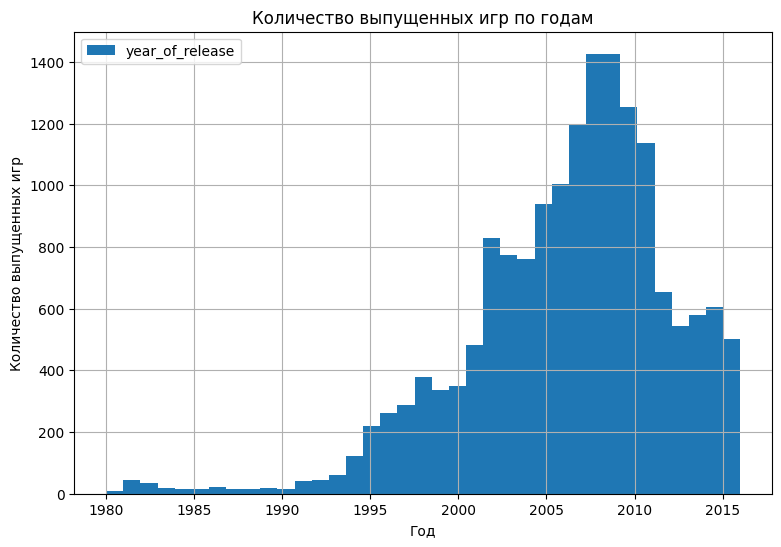

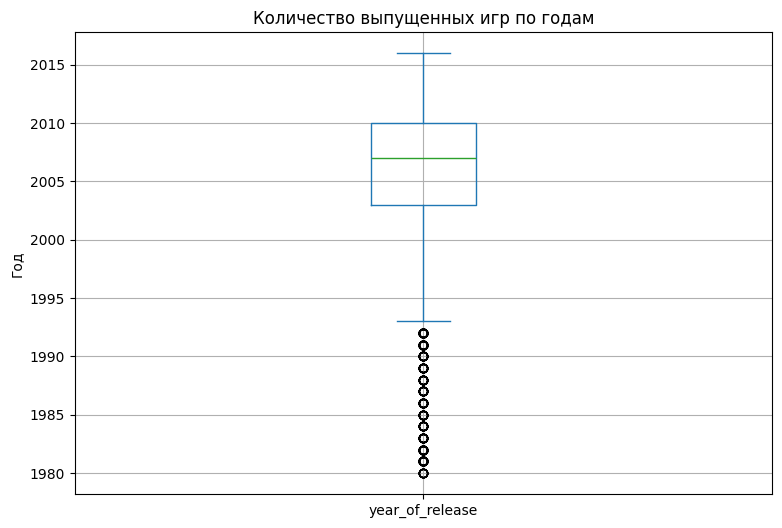

In [41]:
#построим гисторгамму 
data['year_of_release'].plot(
    kind = 'hist',
    bins= 37,
    figsize=(9,6), 
    grid = True,
    legend='year_of_release'
)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

#построим график ящик с усами
data.plot(
    y = ['year_of_release'],
    kind = 'box', 
    figsize=(9,6),
    grid=True,
    legend='year_of_release'
);
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Год')
#plt.xlabel('Количество выпущенных игр')
plt.show()

По построенной гистограмме можно отследить динамику развития индустрии видеоигр. На графике представлена информация об изменении и росте индустрии с течением времени, что позволяет проанализировать ее прогресс и эволюцию. Красочная гистограмма наглядно демонстрирует ключевые моменты и тенденции в мире видеоигр, позволяя нам понять, как эта индустрия развивалась и достигала новых вершин.

Анализ ящика с усами (box plot) подтверждает, что на ранних этапах индустрия видеоигр была слабо развита. Для более детального изучения динамики развития отрасли целесообразно сфокусироваться на данных, начиная с 1994 года, когда начался период активного роста.

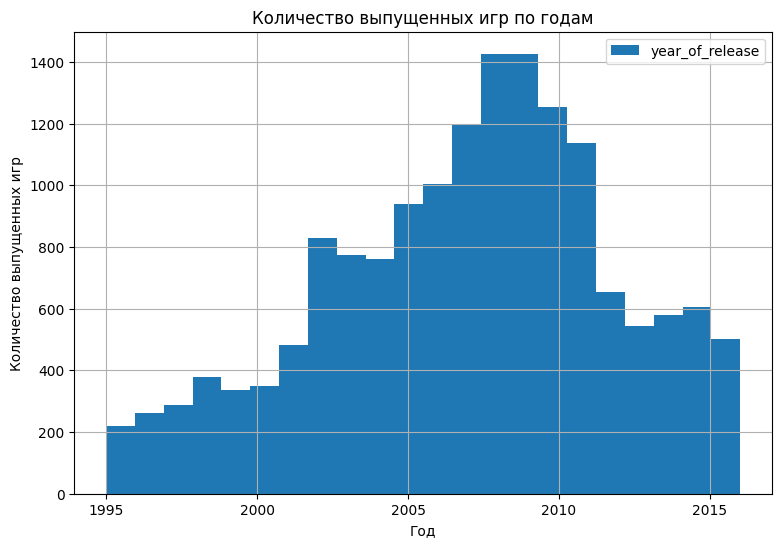

In [42]:
#отфильтруем данные оставим с 1994
analytics_data = data.query('year_of_release > 1994').reset_index(drop=True)

#построим гисторгамму 
analytics_data['year_of_release'].plot(
    kind = 'hist',
    bins= 22,
    figsize=(9,6), 
    grid = True,
    legend='year_of_release'
)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

Построенная гистограмма наглядно демонстрирует динамику развития индустрии видеоигр с 1980 года. В период с 1980 по 1994 год отрасль находилась в стагнации, не показывая значительного роста. Однако, начиная с 1994 года, наблюдается постепенное развитие индустрии, которое достигает своего пика в 2002 году. Этот период можно охарактеризовать как настоящий бум в сфере видеоигр. Стремительный рост продолжается вплоть до 2009 года, после чего начинается резкий спад, продлившийся до 2012 года.

Таким образом, гистограмма позволяет выделить ключевые этапы развития индустрии видеоигр: период зарождения (1980-1994), период постепенного развития (1994-2002), период бурного роста (2002-2009) и период спада (2009-2012). Эти этапы отражают динамику развития отрасли и помогают понять основные тенденции.

### Изменение продаж по платформам

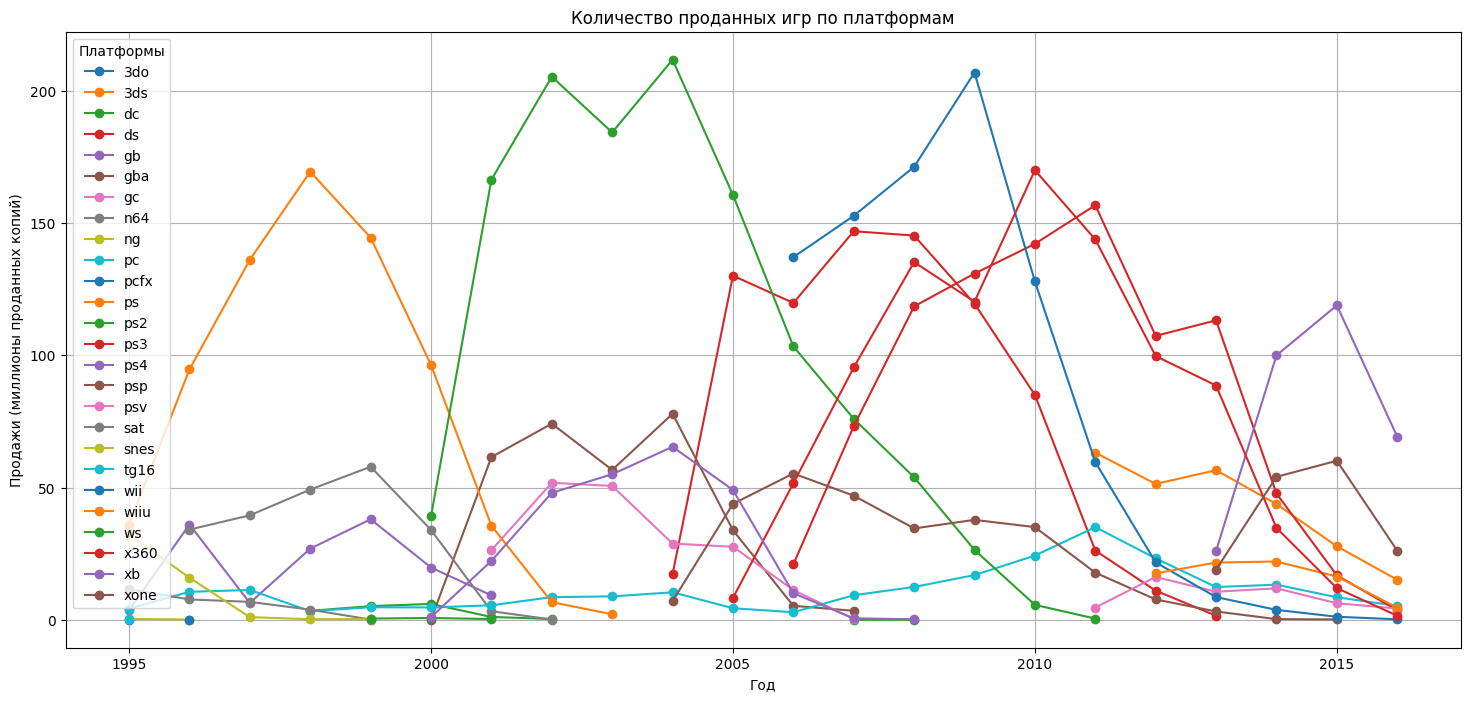

In [43]:
#создадим сводную таблицу и построим график
(
    analytics_data
    .pivot_table( index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
    .plot(kind = 'line', marker='o', grid=True, figsize=(18, 8))        
);

plt.title('Количество проданных игр по платформам')
plt.legend().set_title('Платформы')
plt.xlabel('Год')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.show()

Анализируя представленную диаграмму, можно заметить четкую цикличность в появлении и исчезновении платформ. Новые платформы тенденциозно появляются примерно каждые пять лет, что может быть связано с технологическими циклами разработки и внедрения новых инноваций. В то же время, среднее время существования платформы на рынке составляет около десяти лет, после чего они либо уступают место более современным технологиям, либо значительно теряют свою популярность. Этот цикл подчеркивает динамичность рынка и необходимость для компаний быть готовыми к быстрым изменениям.

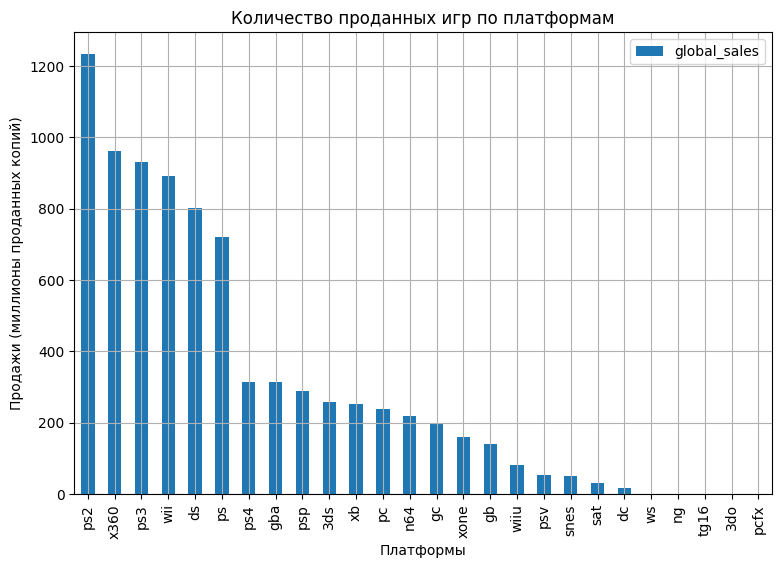

,Платформы,Продажи
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.76
5,ps,721.55
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


In [44]:
#созадим сводную таблицу и построим график
(
    analytics_data
    .pivot_table(index='platform', values='global_sales', aggfunc='sum')
    .sort_values(by='global_sales', ascending=False)
    .plot(y='global_sales', kind='bar',figsize=(9,6),grid=True)
);
plt.title('Количество проданных игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.show()
#выведим информацию представленную на графике
display(
    analytics_data
    .pivot_table(index='platform', values='global_sales', aggfunc='sum')
    .sort_values(by='global_sales', ascending=False)
    .reset_index()
    .rename(columns={'platform': 'Платформы','global_sales':'Продажи'})
    .head(10)
#    .transpose()
)


При анализе представленной диаграммы ясно выделяются шесть ключевых платформ, являющихся лидерами на рынке. Эти платформы — PlayStation 2 (PS2), Xbox 360 (X360), PlayStation 3 (PS3), Wii, Nintendo DS (DS) и PlayStation (PS) — демонстрируют значительное преимущество перед остальными, отделяясь от них значительным отрывом в популярности и продажах. Это подчеркивает их ведущую роль в индустрии и долгосрочное влияние на рынок видеоигр.

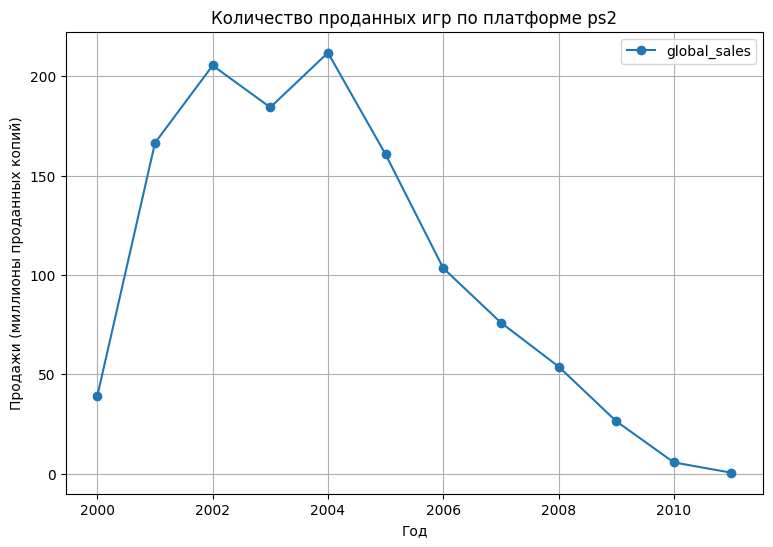

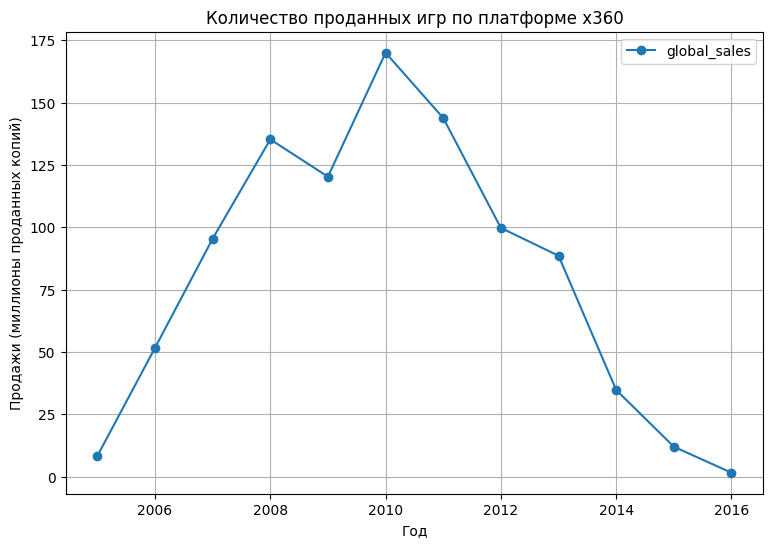

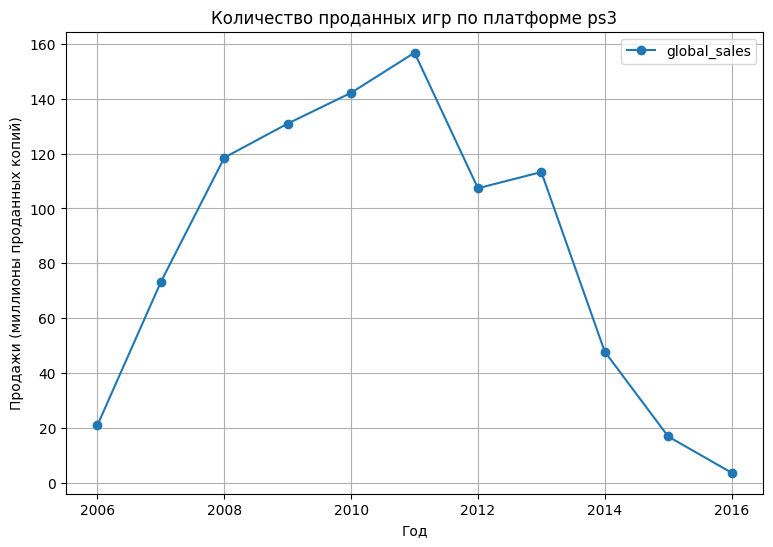

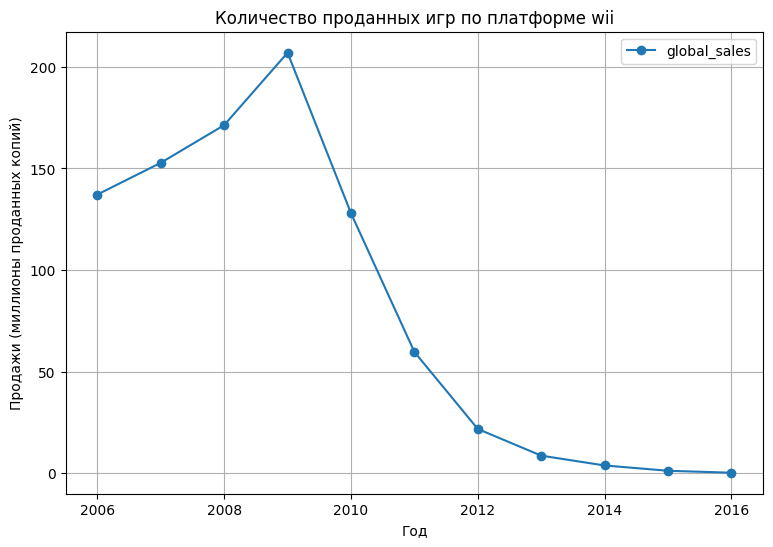

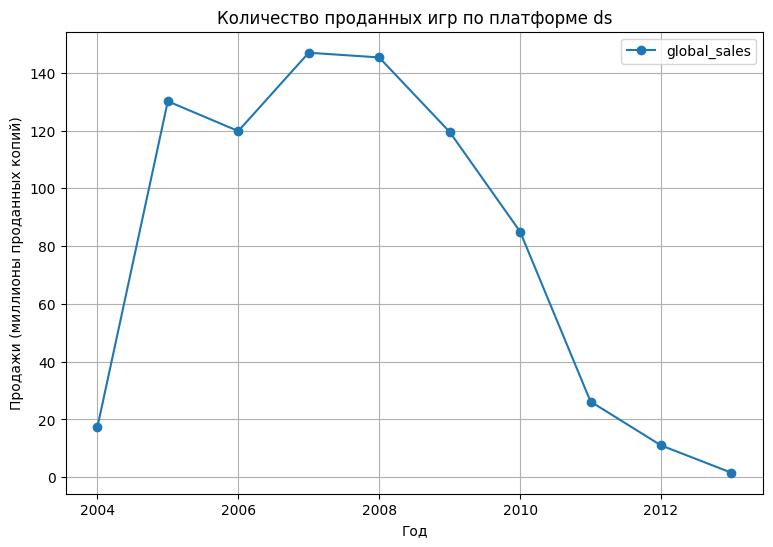

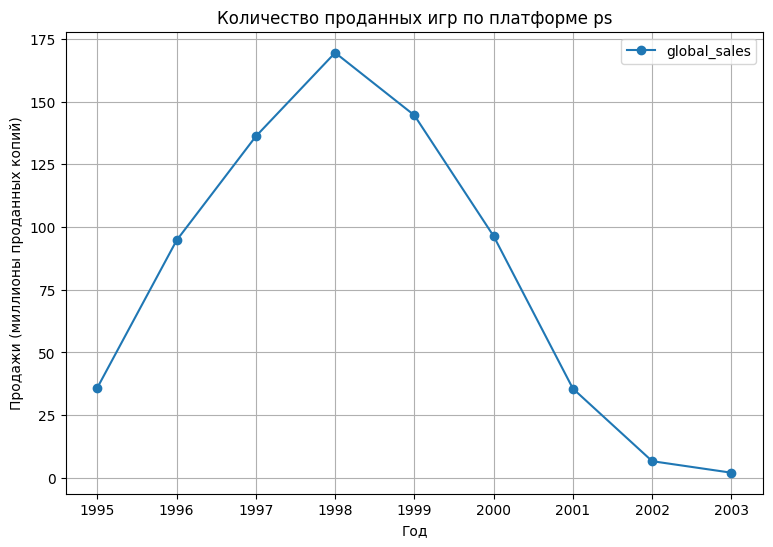

In [45]:
#созадим сводную таблицу и построим графики для 'ps2','x360','ps3','wii','ds','ps'
for platform_name in ['ps2','x360','ps3','wii','ds','ps']:
    (analytics_data.query('platform == @platform_name')
    .pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')
    .plot(marker='o', grid=True, figsize=(9,6))
    )
    
    plt.title(f'Количество проданных игр по платформe {platform_name}')
    plt.xlabel('Год')
    plt.ylabel('Продажи (миллионы проданных копий)')
    plt.show()

Построенные диаграммы, посвященных каждой из платформ, позволяет выявить общую тенденцию к снижению доходов. Этот тренд наблюдается на протяжении всего анализируемого периода и может быть обусловлен различными факторами, включая изменения в потребительском спросе, усиление конкуренции и появление новых технологий. 

### Акутальный период

In [46]:
#отфильтуем таблицу
acutual_data = data.query('year_of_release >= 2014')

Для исследования тенденций в интернет-продажах игр на краткосрочный период из датасета с 1995 года **рекомендуется использовать данные за последние 3-5 лет.** Это связано с тем, что игровая индустрия и интернет-рынок очень динамичны, и более старые данные могут быть нерелевантными для текущей ситуации. 

В анализе краткосрочных тенденций в продажах интернет-магазина игр, актуальные данные часто более важны, поскольку рынок видеоигр быстро меняется под влиянием технологических инноваций, изменений в потребительских предпочтениях и других внешних факторов, таких как экономические условия или глобальные события.

**Вот почему не стоит использовать данные за более ранние периоды:**

- **Технологические изменения:** Технологии в игровой индустрии и интернете развиваются очень быстро. То, что было популярно 5-10 лет назад, может быть уже неактуально.
- **Изменение потребительского поведения:** Предпочтения геймеров и модели потребления также меняются со временем.
- **Экономические факторы:** Экономические условия могут сильно влиять на продажи игр. Данные из периодов экономических спадов или подъемов могут исказить результаты исследования.

### Лидеры продаж

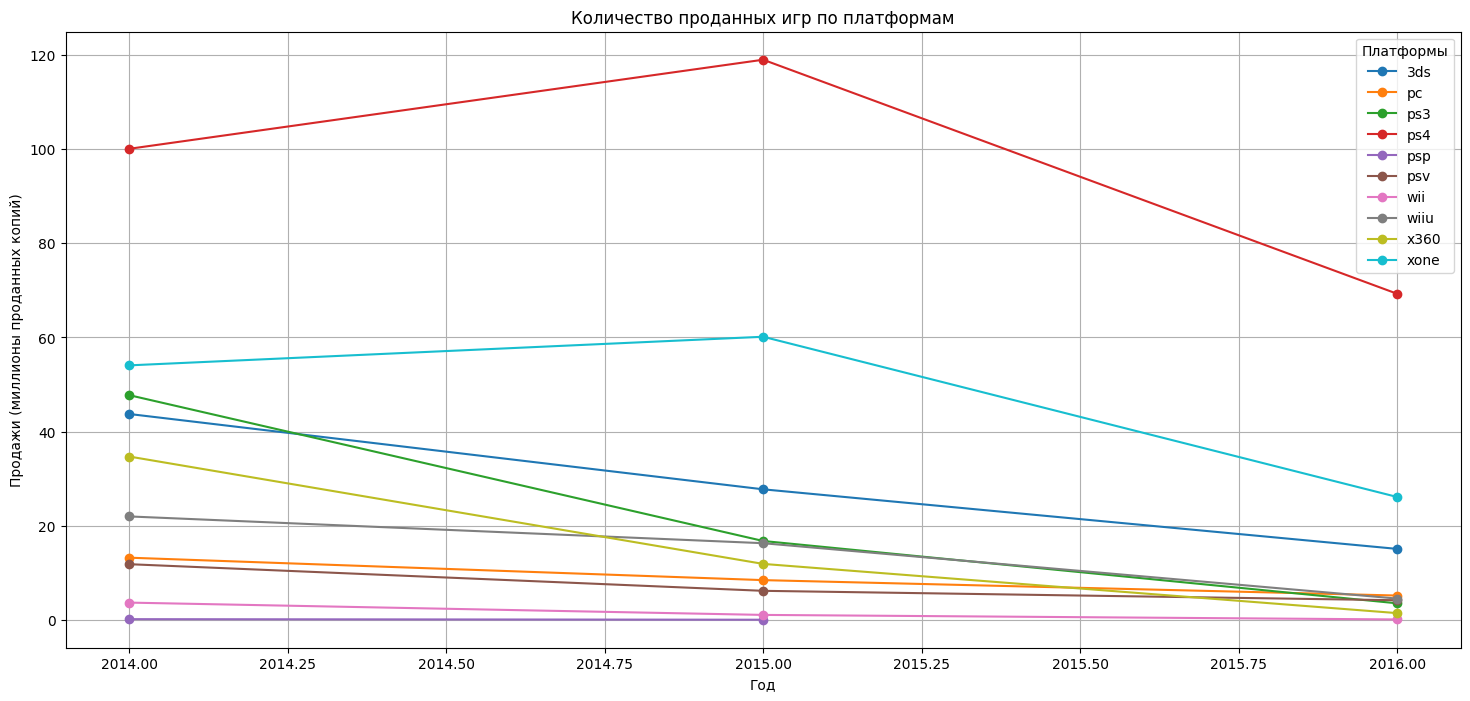

,Платформы,Продажи
0,ps4,288.15
1,xone,140.36
2,3ds,86.68
3,ps3,68.18
4,x360,48.22
5,wiiu,42.98
6,pc,27.05
7,psv,22.40
8,wii,5.07
9,psp,0.36


In [47]:
#созадим сводную таблицу и построим график
(
    acutual_data
    .pivot_table( index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
    .plot(kind='line', marker='o', grid=True, figsize=(18, 8))        
);

plt.title('Количество проданных игр по платформам')
plt.legend().set_title('Платформы')
plt.xlabel('Год')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.show()
#выведим информацию представленную на графике
display(
    acutual_data
    .pivot_table(index='platform', values='global_sales', aggfunc='sum')
    .sort_values(by='global_sales', ascending=False)
    .reset_index()
    .rename(columns={'platform': 'Платформы','global_sales':'Продажи'})
    .head(10)
#    .transpose()
)

По результатам анализа данных за 2014 год, предоставленных в диаграмме, можно сделать вывод о том, что **PS4 является явным лидером** среди всех представленных платформ. Этот вывод сильно отличается от ситуации, которая наблюдалась в 1995 году, когда лидером среди платформ была PS2. Таким образом, сравнение диаграмм, основанных на данных за разные периоды времени, позволяет увидеть заметную тенденцию изменения позиций лидеров на рынке платформ.

### Диарграмма «ящик с усами» по глобальным продажам

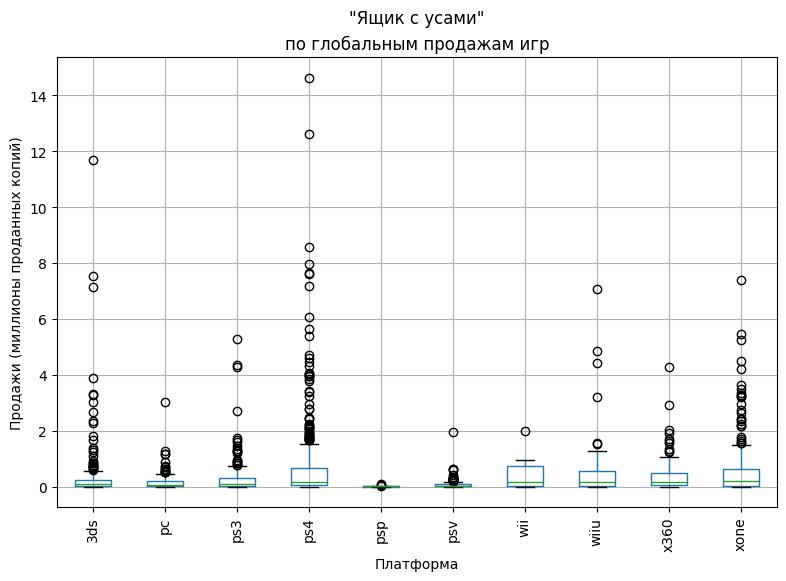

In [48]:
#построим диаграмму ящик с усами
acutual_data.boxplot(column='global_sales',
                     by='platform',
                     figsize=(9,6));
plt.suptitle('"Ящик с усами"')
plt.title('по глобальным продажам игр')
plt.xlabel('Платформа')
plt.ylabel('Продажи (миллионы проданных копий)');
plt.xticks(rotation=90)
plt.show()

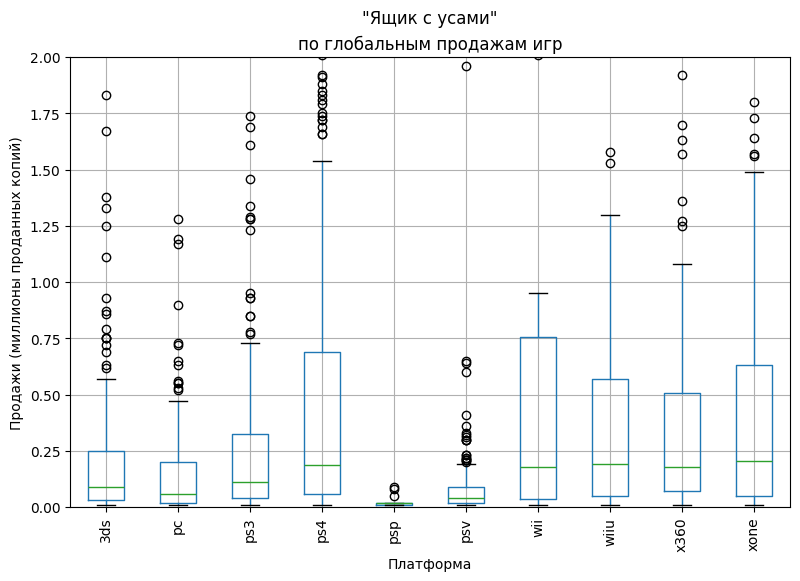

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3ds        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
pc         0.0200  0.060  0.2000  151.0   3.05  0.179139  0.01  0.329359
ps3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
ps4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
psp        0.0100  0.020  0.0200   13.0   0.09  0.027692  0.01  0.027735
psv        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
wii        0.0350  0.180  0.7550   11.0   2.01  0.460909  0.01  0.625451
wiiu       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
x360       0.0700  0.180  0.5050  111.0   4.28  0.434414  0.01  0.628967
xone       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

In [49]:
#построим диаграмму ящик с усами с ограничениями 
acutual_data.boxplot(column='global_sales', by='platform', figsize=(9,6));
plt.ylim([0,2])
plt.suptitle('"Ящик с усами"')
plt.title('по глобальным продажам игр')
plt.xlabel('Платформа')
plt.ylabel('Продажи (миллионы проданных копий)');
plt.xticks(rotation=90)
plt.show()
#выведим информацию представленную на графике
display(acutual_data.pivot_table(index='platform', values = 'global_sales', aggfunc = ['describe']))

Анализ диаграммы "ящик с усами", отображающей глобальные продажи, позволяет наглядно оценить разброс и медиану продаж для каждой игровой платформы. Особенно **выделяется PlayStation 4 (PS4)**, демонстрирующая самый широкий охват пользователей. Это подтверждается не только максимальными и минимальными значениями продаж, но и значительным размахом "усов" диаграммы, указывающим на большую вариативность данных. Таким образом, PS4 значительно опережает другие платформы по масштабу аудитории, привлекая внимание широкого круга геймеров по всему миру.

### Зависимость проадж от отзывов на **платформе ps4**

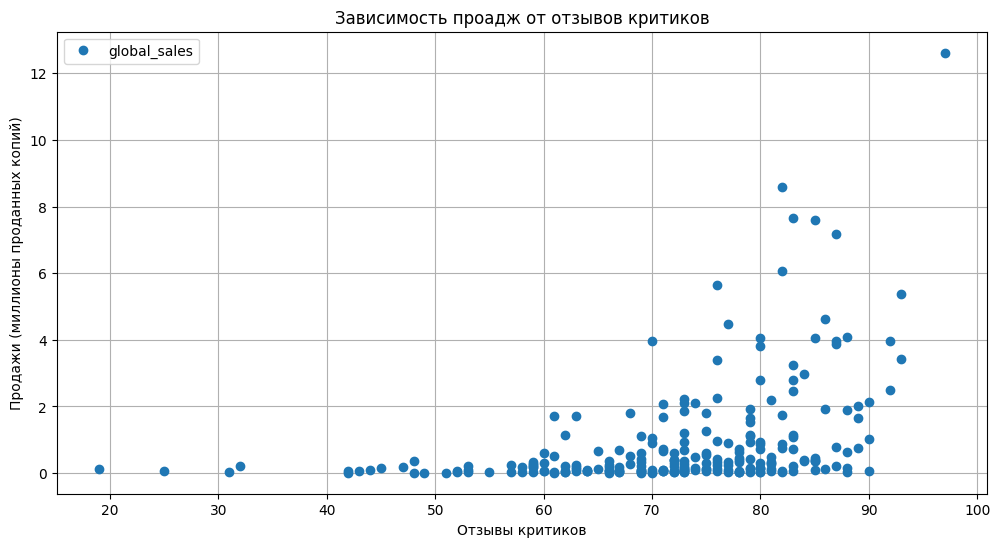

Процент корреляции продаж к отзывам критиков: 40%


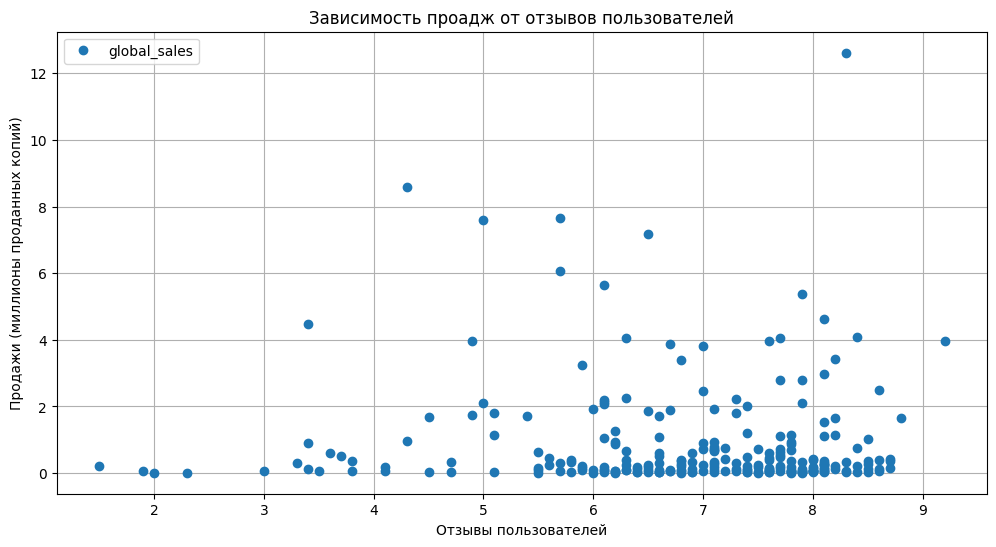

Процент корреляции продаж к отзывам пользователей: -4%


In [50]:
#построим диаграмму зависимости продаж от отзывов критиков
(
    acutual_data
    .query('platform == "ps4"')
    .dropna(subset=['critic_score'])
    .plot(y='global_sales', x='critic_score', style='o', figsize=(12, 6))
)
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.grid(True)
plt.title('Зависимость проадж от отзывов критиков')
plt.legend()
plt.show()
#выведем процент корреляции продаж к отзывам критиков
print(f'Процент корреляции продаж к отзывам критиков: \
{acutual_data.query('platform == "ps4" and critic_score.notna()')["global_sales"].corr(acutual_data.query('platform == "ps4" and critic_score.notna()')['critic_score']):.0%}')

#построим диаграмму зависимости продаж от отзывов пользователей
(
    acutual_data
    .query('platform == "ps4"')
    .dropna(subset=['user_score'])
    .plot(y='global_sales', x='user_score', style='o', figsize=(12, 6))
)

plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.grid(True)
plt.title('Зависимость проадж от отзывов пользователей')
plt.legend()
plt.show()
#выведем процент корреляции продаж к отзывам пользователей
print(f'Процент корреляции продаж к отзывам пользователей: \
{acutual_data.query('platform == "ps4" and user_score.notna()')["global_sales"].corr(acutual_data.query('platform == "ps4" and user_score.notna()')['user_score']):.0%}')

По результатам анализа диаграмм, зависимости продаж от отзывов на платформе PS4, можно сделать вывод о том, что между этими двумя переменными существуют некоторые связи.

В частности, по данным диаграмм, можно увидеть, что **существует корреляция продаж к отзывам критиков, которая составляет около 40%**. Этот показатель считается слабым положительным отношением, что означает, что с ростом положительных отзывов критиков на платформе PS4, продажи также немного увеличиваются.

С другой стороны, **корреляция продаж к отзывам пользователей на платформе PS4 составляет всего -4%**, что может рассматриваться как отсутствие отношений между этими двумя переменными. Это означает, что отзывы пользователей не имеют существенного влияния на продажи платформы PS4.

Таким образом, по результатам анализа диаграмм, можно сделать вывод, что слабая корреляция между продажами и отзывами критиков на платформе PS4 может быть связана с тем, что отзывы критиков могут влиять на популярность платформы, но не настолько сильно, чтобы существенно повлиять на продажи. В то же время, отзывы пользователей, похоже, не имеют практически никакого влияния на продажи платформы PS4.

### Зависимость проадж от отзывов на других платформах

In [51]:
def corr_score_sales(name):
    print(f'Платформа {name}')
    print(f'Процент корреляции продаж к отзывам критиков на платформе {name}: \
    {data_critic_score.query('platform == @name')["global_sales"].corr(data_critic_score.query('platform == @name')['critic_score']):.0%}')
    print(f'Процент корреляции продаж к отзывам пользователей на платформе {name}: \
    {data_user_score.query('platform == @name')["global_sales"].corr(data_user_score.query('platform == @name')['user_score']):.0%}')

for platform_name in ['xone','wiiu','x360','wii']:
    data_critic_score = (acutual_data.dropna(subset=['critic_score']))
    data_user_score = (acutual_data.dropna(subset=['user_score']))
    corr_score_sales(platform_name)

Платформа xone
Процент корреляции продаж к отзывам критиков на платформе xone:     43%
Процент корреляции продаж к отзывам пользователей на платформе xone:     -7%
Платформа wiiu
Процент корреляции продаж к отзывам критиков на платформе wiiu:     37%
Процент корреляции продаж к отзывам пользователей на платформе wiiu:     41%
Платформа x360
Процент корреляции продаж к отзывам критиков на платформе x360:     53%
Процент корреляции продаж к отзывам пользователей на платформе x360:     -14%
Платформа wii
Процент корреляции продаж к отзывам критиков на платформе wii:     nan%
Процент корреляции продаж к отзывам пользователей на платформе wii:     100%


Исследуем влияние отзывов на других платформах (xone, wiiu, x360, wii) на продажи.

**Платформа xone:**

Процент корреляции продаж к отзывам критиков на платформе xone составляет 43%. Это означает, что с увеличением количества положительных отзывов критиков, продажи платформы также могут немного увеличиваться.

Процент корреляции продаж к отзывам пользователей на платформе xone составляет -7%. Это означает, что отзывы пользователей не имеют значительного влияния на продажи платформы.

**Платформа wiiu:**

Процент корреляции продаж к отзывам критиков на платформе wiiu составляет 37%. Это означает, что с увеличением количества положительных отзывов критиков, продажи платформы могут также немного увеличиваться.

Процент корреляции продаж к отзывам пользователей на платформе wiiu составляет 41%. Это означает, что отзывы пользователей могут иметь некоторое влияние на продажи платформы.

**Платформа x360:**

Процент корреляции продаж к отзывам критиков на платформе x360 составляет 53%. Это означает, что с увеличением количества положительных отзывов критиков, продажи платформы могут значительно увеличиваться.

Процент корреляции продаж к отзывам пользователей на платформе x360 составляет -14%. Это означает, что отзывы пользователей не имеют значительного влияния на продажи платформы.

**Платформа wii:**

Процент корреляции продаж к отзывам критиков на платформе wii не определен, так как данные имеют слишком маленький объем.


Таким образом, по результатам анализа корреляции продаж к отзывам критиков и пользователей на различных платформах, можно сделать вывод о том, что данная связь может значительно варьироваться в зависимости от платформы, и что платформы могут иметь свои собственные, уникальные аудитории, которые могут реагировать на отзывы критиков и пользователей по-разному.

### Распределение продаж игр по жанрам

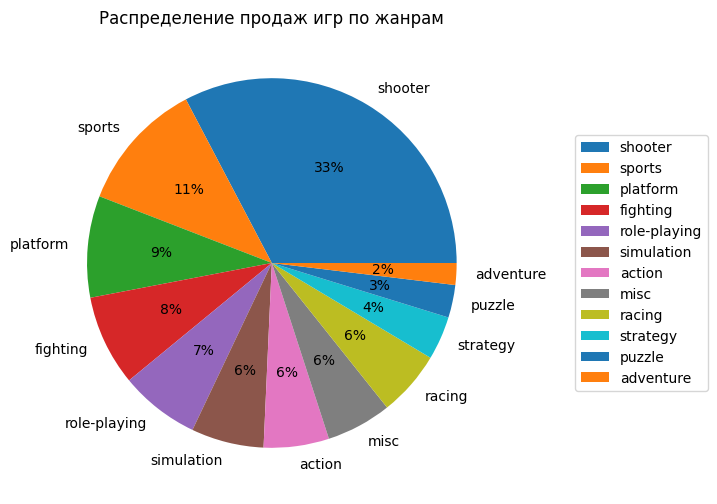

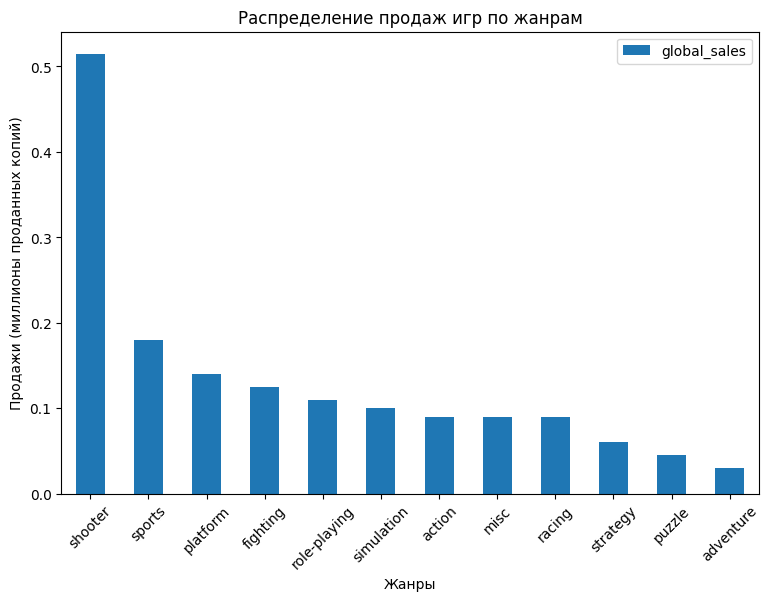

In [52]:
(
    acutual_data
    .pivot_table(index='genre', values='global_sales', aggfunc='median')
    .sort_values(by='global_sales', ascending=False)
    .plot(y='global_sales', kind='pie', autopct='%1.0f%%', figsize=(9,6))
);
plt.legend(loc='center', bbox_to_anchor=(1.3,0.5))
plt.title('Распределение продаж игр по жанрам')
plt.ylabel(None)
plt.show()

(
    acutual_data
    .pivot_table(index='genre', values='global_sales', aggfunc='median')
    .sort_values(by='global_sales', ascending=False)
    .plot(y='global_sales', kind='bar', figsize=(9,6))
);
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи (миллионы проданных копий)')
plt.xticks(rotation=45)
plt.show()

Анализ диаграмм, отражающих распределение продаж игр по жанрам, выявляет **явного лидера - жанр шутер (shooter).** C большим отрывом, уступая ему в популярности, следуют жанр спорт (Sports), за ними – жанр платформер (Platform). Таким образом, динамичные и насыщенные событиями игры занимают верхние строчки рейтинга.

### Вывод

Анализ гистограммы и диаграмм ящика с усами дал понимание эволюции индустрии видеоигр. Графики наглядно показали, что период с 1980 по 1994 год характеризовался стагнацией, после чего с 1994 года начался период активного роста, достигший пика в 2002 году. Последующий бум в сфере видеоигр продолжался до 2009 года, после чего наступил спад, продлившийся до 2012 года. Цикличность появления и исчезновения платформ подчеркивает динамичность рынка, а лидирующие позиции таких платформ, как PlayStation 2, Xbox 360, PlayStation 3, Wii, Nintendo DS и PlayStation, свидетельствуют о их значительном влиянии на развитие отрасли.

Краткосрочный анализ интернет-продаж игр выявил, что для получения актуальных выводов необходимо использовать данные за последние 3-5 лет, учитывая быстрое развитие технологий и изменение потребительского поведения. Анализ данных за 2014 год показал, что PlayStation 4 (PS4) значительно опережает другие платформы по популярности, что подтверждается широким охватом пользователей и высокими показателями продаж.

Исследование корреляции между продажами и отзывами на различных платформах выявило слабую положительную связь между продажами и отзывами критиков на платформе PS4, в то время как отзывы пользователей практически не влияют на продажи. Аналогичный анализ для других платформ (xone, wiiu, x360, wii) показал вариативность этой связи, что указывает на уникальные особенности каждой платформы и ее аудитории.

Анализ распределения продаж игр по жанрам выявил, что шутер-игры являются лидерами в продажах, следующими по популярности являются спортивные и платформер игры. Это свидетельствует о предпочтении игроков динамичных и событийно-насыщенных игр.

В целом, анализ данных позволил выявить ключевые тенденции и этапы развития индустрии видеоигр, а также влияние различных факторов на успех игр и платформ.

## Портрет пользователей по регионам

Составим портрет пользователей для каждого региона.

In [53]:
#напишем функциию для оперделния портрета пользователя
def region_user(region,text):
    fig, axs = plt.subplots(1, 3, figsize=(16,8))
    fig.suptitle(f'{text}', fontsize=15, y=0.8)
    
    # График 1: Жанры
    acutual_data.pivot_table(index='genre', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False)\
    .head()\
    .plot(y=region, kind='pie', autopct='%1.0f%%', ax=axs[0], legend=False)    
    axs[0].legend(loc='center', bbox_to_anchor=(1.0,-0.01))
    axs[0].set_title('Распределение продаж игр по жанрам', fontsize=10)
    axs[0].set_ylabel(None)

    # График 2: Платформы
    acutual_data.pivot_table(index='platform', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False)\
    .head()\
    .plot(y=region, kind='pie', autopct='%1.0f%%', ax=axs[1], legend=False)
    axs[1].legend(loc='center', bbox_to_anchor=(1.0,-0.01))
    axs[1].set_title('Распределение продаж игр по платформам', fontsize=10)
    axs[1].set_ylabel(None)

    # График 3: Рейтинг
    acutual_data.pivot_table(index='rating', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False)\
    .head()\
    .plot(y=region, kind='pie', autopct='%1.0f%%', ax=axs[2])
    axs[2].legend(loc='center', bbox_to_anchor=(1.0,-0.01))
    axs[2].set_title('Распределение продаж игр по категории', fontsize=10)
    axs[2].set_ylabel(None)

    plt.show()

    # Таблица 1: Жанры
#    print('Распределение продаж игр по жанрам')
#    display(acutual_data.pivot_table(index='genre', values = region, aggfunc = ['describe']))

    # Таблица 2: Платформы
#    print('Распределение продаж игр по платформам')
#    display(acutual_data.pivot_table(index='platform', values = region, aggfunc = ['describe']))

    # Таблица 3: Рейтинг
#    print('Распределение продаж игр по рейтингу')
#    display(acutual_data.pivot_table(index='rating', values = region, aggfunc = ['describe']))


### Портрет пользователей **Северной Америки (na_sales)**

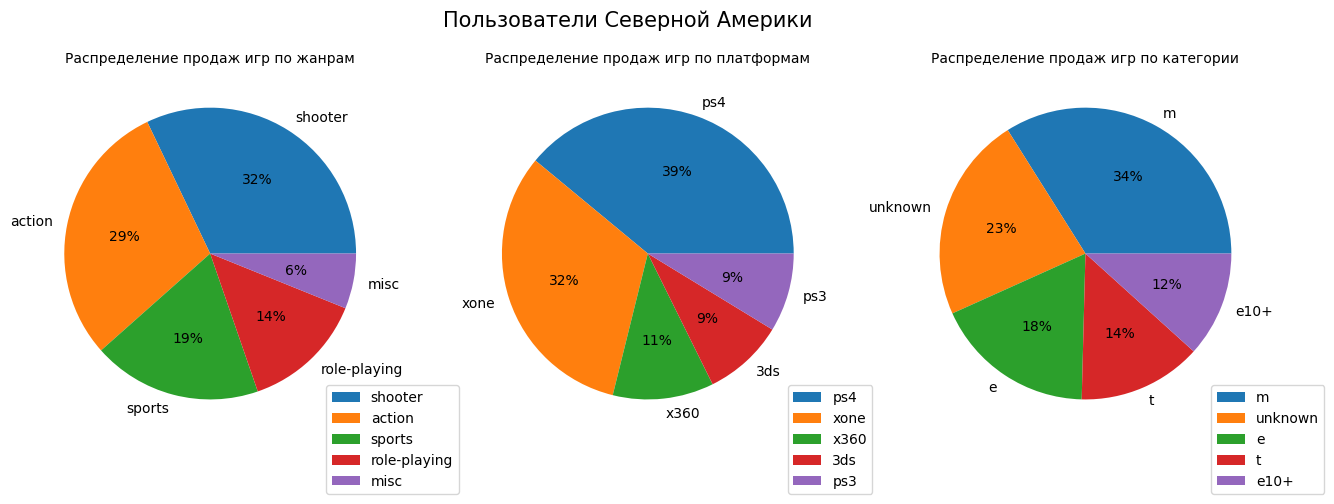

In [54]:
region_user('na_sales','Пользователи Северной Америки')

Проведенный анализ продаж видеоигр в Северной Америке (na_sales) позволяет составить характерный портрет среднестатистического геймера этого региона.

**Ключевые черты:**

- **Жанр:** шутер (shooter) занимает лидирующую позицию.
  
- **Платформа:** PS4 является самой популярной платформой.

- **Возрастная категория:** Категория "M" (Mature, 17+) является доминирующей, что говорит о преобладании взрослой аудитории среди любителей видеоигр в Северной Америке.

В совокупности эти данные формируют образ современного североамериканского геймера: взрослого пользователя, предпочитающего динамичные шутер-игры на платформе PS4.

### Портрет пользователей **Европы (eu_sales)**

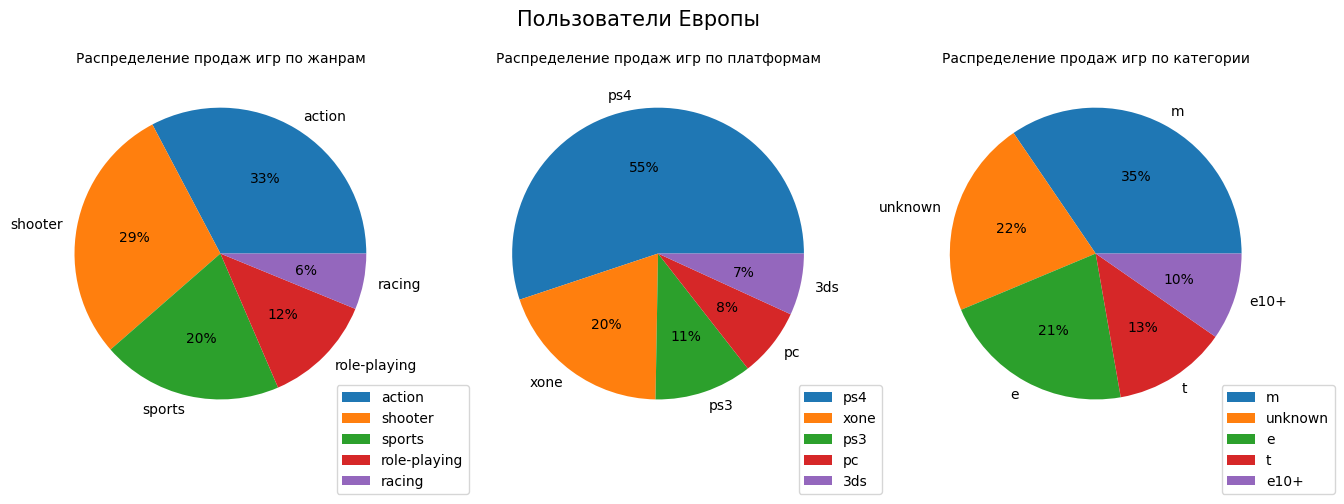

In [55]:
region_user('eu_sales','Пользователи Европы')

Проведенный анализ продаж видеоигр в Европы (eu_sales) позволяет составить характерный портрет среднестатистического геймера этого региона.

**Ключевые черты:**

- **Жанр:** экшен (action) занимает лидирующую позицию

- **Платформа:** PS4 является самой популярной платформой.

- **Возрастная категория:** Категория "M" (Mature, 17+) является доминирующей, что говорит о преобладании взрослой аудитории среди любителей видеоигр в Европе.

В совокупности эти данные формируют образ современного европейского геймера: взрослого пользователя, предпочитающего экшн-игры на платформе PS4.

### Портрет пользователей **Японии (jp_sales)**

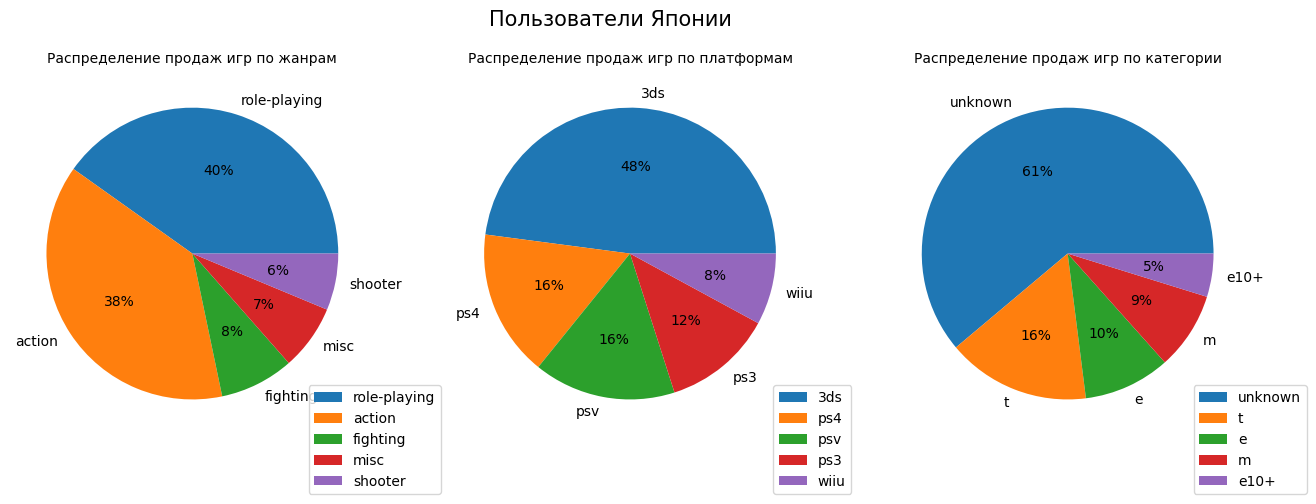

In [56]:
region_user('jp_sales','Пользователи Японии')

Проведенный анализ продаж видеоигр в Европы (eu_sales) позволяет составить характерный портрет среднестатистического геймера этого региона.

**Ключевые черты:**

- **Жанр:** ролевые (role-playing) занимает лидирующую позицию

- **Платформа:** 3ds является самой популярной платформой.

- **Возрастная категория:** Категория "unknown" является доминирующей, Возможной причиной отсутствия возрастной категории может быть то, что игра ещё не прошла процедуру возрастной классификации, или игра не подпадает под общепринятые стандарты возрастной классификации.

В совокупности эти данные формируют образ современного японского геймера: без возрастной категории., предпочитающего ролевые-игры на платформе 3ds.

### Вывод

Анализ продаж видеоигр в разных регионах позволяет сделать вывод о предпочтениях геймеров. Несмотря на некоторые различия, есть и общие тенденции. Например, во всех регионах популярны динамичные жанры, такие как шутер и экшен, что указывает на любовь игроков к активному и захватывающему игровому процессу. PS4 является доминирующей платформой в Северной Америке и Европе, в то время как в Японии наблюдается предпочтение портативной консоли 3ds, что может быть связано с культурными особенностями и популярностью игр на ходу.

В целом, можно сделать вывод, что современные геймеры являются взрослыми пользователями, предпочитающими зрелые и насыщенные игровые сюжеты. 

## Проверка гипотез

### Гипотеза **№1**

Проверим гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**H_0:** Средние пользовательский рейтинг платформы Xbox One **=** среднее пользовательскому рейтингу платформы PC.

**H_1:** Средние пользовательский рейтинг платформы Xbox One **≠** среднее пользовательскому рейтингу платформы PC.

Так как у нас гипотеза о равенстве двух генеральных совокупностей, для двух независимых выборок, мы будем использовать t-тест `st.ttest_ind()` с аргументом `alternative='two-sided'`.

In [57]:
#dropna_actual_data = acutual_data.dropna(subset=['user_score'])
results = st.ttest_ind(acutual_data.dropna(subset=['user_score']).query('platform == "xone"')['user_score'],\
                       acutual_data.dropna(subset=['user_score']).query('platform == "pc"')['user_score'],\
                       equal_var=False,
                       alternative='two-sided'
                      )

alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:',results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


Проведенный t-тест для независимых выборок не позволил отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Полученное p-значение (0.1160) больше уровня значимости (обычно 0.05), что означает, что полученные различия в рейтингах могут быть результатом случайной вариации. 

Таким образом, на основании имеющихся данных мы не можем утверждать, что средние рейтинги платформ Xbox One и PC статистически значимо отличаются.

### Гипотеза **№2**

Проверим гипотезу:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**H_0:** Средние пользовательский рейтинг жанров Action **=** среднее пользовательскому рейтингу жанров Sports.

**H_1:** Средние пользовательский рейтинг жанров Action **≠** среднее пользовательскому рейтингу жанров Sports.

Так как у нас гипотеза о равенстве двух генеральных совокупностей, для двух независимых выборок, мы будем использовать t-тест `st.ttest_ind()` с аргументом `alternative='two-sided'`.

In [58]:
results = st.ttest_ind(acutual_data.dropna(subset=['user_score']).query('genre == "action"')['user_score'],\
                       acutual_data.dropna(subset=['user_score']).query('genre == "sports"')['user_score'],\
                       equal_var=False,
                       alternative='two-sided'
                      )

alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:',results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Проведенный t-тест для независимых выборок позволил отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports. Полученное p-значение (1.1825) значительно меньше уровня значимости (обычно 0.05), что означает, что полученные различия в рейтингах **не** являются результатом случайной вариации. 

Таким образом, на основании имеющихся данных мы можем утверждать, что средние рейтинги жанров Action и Sports статистически значимо отличаются.

## Общий вывод

В ходе данного проекта мы провели анализ рынка  видеоигр для интернет-магазина "Стримчик", чтобы выявить основные факторы, определяющие успех в этой отрасли. Исследование рынка компьютерных игр было направлено на выявление ключевых факторов успеха в этой динамично развивающейся индустрии. Анализ обширных данных о продажах, отзывах пользователей и критиков, а также жанровых и платформенных предпочтениях позволил нам сформировать тренды игрового рынка.
Мы анализировали открытые данные о продажах, отзывах пользователей и экспертов, жанрах и платформах, чтобы лучше понять современные тенденции и предпочтения игроков.

**Динамика развития:** 

Исследование показало, что индустрия видеоигр прошла сложный путь от периода застоя к стремительному росту, демонстрируя ярко выраженную цикличность развития. Ключевую роль в формировании рынка сыграли такие платформы, как PlayStation и Xbox, каждая из которых ознаменовала собой новую эпоху в игровой индустрии.

**Отзывы:** 

Анализ данных выявил слабую положительную корреляцию между отзывами критиков и продажами игр на платформе PS4. При этом отзывы пользователей не оказали существенного влияния на продажи. Важно отметить, что на других платформах эта взаимосвязь может меняться, указывая на уникальные особенности каждой платформы и ее аудитории. 

**Жанровые предпочтения:** 

Несомненными лидерами по продажам являются шутеры и спортивные жанры, что свидетельствует о ярко выраженной  склонности игроков к динамичным и захватывающим играм.  Это знание может быть полезно разработчикам при создании новых проектов.

**Региональные особенности:**

Несмотря на общие тенденции, исследование выявило заметные региональные различия в предпочтениях игроков.  Например, в Японии портативная консоль Nintendo 3DS пользуется большей популярностью, чем в Северной Америке и Европе, где доминирует PS4.  Это подчеркивает важность учета культурных особенностей и специфики рынка при разработке и продвижении игр.

**Портрет современного геймера:**

Анализ данных позволяет сделать вывод, что современный геймер - это, как правило, взрослый пользователь, который ценит глубокий сюжет, проработанный геймплей и качественную графику.  Игры все чаще становятся инструментом для погружения в захватывающие миры и  переживания  незабываемых эмоций.

**Сравнение платформ и жанров:**

Проведенный статистический анализ не выявил  значимых различий в пользовательских рейтингах платформ Xbox One и PC.  В то же время, пользовательские оценки игр жанров Action и Sports  показали статистически значимые различия.

**Рекомендации:**

* Разработчикам следует учитывать популярность динамичных жанров, но при этом не забывать о разнообразии аудитории и ее интересах.
  
* Издателям важно учитывать региональные особенности рынка при продвижении игр.
  
* Инвесторам стоит обратить внимание на перспективные платформы и жанры с высоким потенциалом роста.

В заключение, проведенное исследование позволило получить ценные сведения о современной игровой индустрии,  ее движущих силах и  предпочтениях игроков.  